<a href="https://colab.research.google.com/github/tejal29may/google.-html/blob/main/spark_foundation_task_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **The Sparks Foundation - Data Science & Business Analytics Internship**
**TASK 1 - Prediction using Supervised Machine Learning**



**In This Regression Task ,we will predict the percetage of marks that student is expected to score based upon the numbw=er of hours they studied.**

**Name : Tejal Sudhakarrao Mohod**

**Branch  : Comuter Science And Engineering**

**datasete link** : (https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv)

**Step 1 : Importing Datasets**

In [2]:
#importing all requires libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

**Reading And Preoaring data**

In [18]:
data=pd.read_csv('https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv')
print("The shape dataset is : ",data.shape)


The shape dataset is :  (25, 2)


In [19]:
data.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [17]:
data.tail()

,Hours,Scores
20,2.7,30
21,4.8,54
22,3.8,35
23,6.9,76
24,7.8,86


In [6]:
#checking for missing values

data.isnull().sum()

Hours     0
Scores    0
dtype: int64

In [7]:
data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


**Step 2 : Visualizing The Datasets**

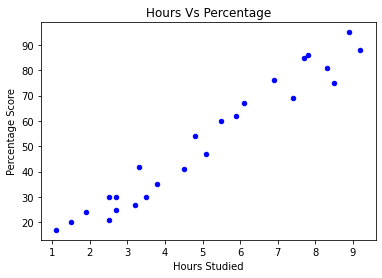

In [28]:
data.plot(kind='scatter',x='Hours',y='Scores',color="blue")
plt.title("Hours Vs Percentage")
plt.xlabel('Hours Studied')
plt.ylabel('Percentage Score')
plt.show()

In [11]:
data.corr(method='pearson')

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


In [12]:
data.corr(method='spearman')

,Hours,Scores
Hours,1.000000,0.971891
Scores,0.971891,1.000000


**Step 3 : Data Preparation**

In this step we will devide the data in two "features" (input)  and "laabels"(output) .After that we will split the whole dataset into 2parts - testing and training data

In [29]:
data.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [30]:
#using iloc function we will devide the data

x=data.iloc[:,:1].values
y=data.iloc[:,1:].values

In [31]:
x


array([[2.5],
       [5.1],
       [3.2],
       [8.5],
       [3.5],
       [1.5],
       [9.2],
       [5.5],
       [8.3],
       [2.7],
       [7.7],
       [5.9],
       [4.5],
       [3.3],
       [1.1],
       [8.9],
       [2.5],
       [1.9],
       [6.1],
       [7.4],
       [2.7],
       [4.8],
       [3.8],
       [6.9],
       [7.8]])

In [32]:
y

array([[21],
       [47],
       [27],
       [75],
       [30],
       [20],
       [88],
       [60],
       [81],
       [25],
       [85],
       [62],
       [41],
       [42],
       [17],
       [95],
       [30],
       [24],
       [67],
       [69],
       [30],
       [54],
       [35],
       [76],
       [86]])

In [35]:
#spliting the data into training and testing
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

**Step 4 : Training The algorithm**

In [36]:
from sklearn.linear_model import LinearRegression

model=LinearRegression()
model.fit(x_train,y_train)

LinearRegression()

**Step 5 : Visualizing The Model**

After training the model it stime to visualize the model

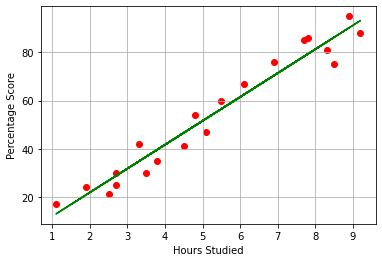

In [39]:
line=model.coef_*x + model.intercept_

#ploting for training data

plt.scatter(x_train,y_train,color="red")
plt.plot(x,line,color="green")
plt.xlabel("Hours Studied")
plt.ylabel("Percentage Score")
plt.grid()
plt.show()

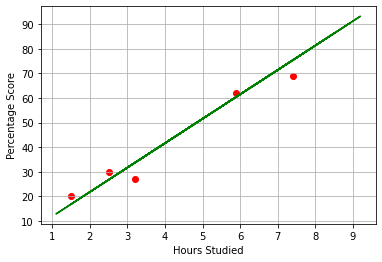

In [40]:
#plotting for testing data

plt.scatter(x_test,y_test,color="red")
plt.plot(x,line,color="green")
plt.xlabel("Hours Studied")
plt.ylabel("Percentage Score")
plt.grid()
plt.show()


**Step 6 : Making Predictions**

Now ,we have trained our algorithm ,now its time to mak esome predictions

In [42]:
print(x_test)
y_pred =model.predict(x_test)

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]


In [43]:
y_test

array([[20],
       [27],
       [69],
       [30],
       [62]])

In [44]:
y_pred

array([[16.88414476],
       [33.73226078],
       [75.357018  ],
       [26.79480124],
       [60.49103328]])

In [45]:
#comparing actual vs predicted

comp=pd.DataFrame({ 'Actual ' : [y_test],'Predicted':[y_pred]})
comp

,Actual,Predicted
0,"[[20], [27], [69], [30], [62]]","[[16.884144762398023], [33.732260779489835], [..."


In [48]:
#Testing with your own data

hours=9.25
own_pred=model.predict([[hours]])
print("the Predicted score if a person studied for",hours,"hours is ",own_pred[0])

the Predicted score if a person studied for 9.25 hours is  [93.69173249]


**Step 7 : Evaluating the model**

in the last step we are going to evaluate trained model by calculating absolute error

In [49]:
from sklearn import metrics
print("Mean Absolute Error : ",metrics.mean_absolute_error(y_test,y_pred))

Mean Absolute Error :  4.183859899002982
